# **Import data**

In [153]:
#https://drive.google.com/file/d/1peAb1oNexs50eXbeWJ0_AVk25VskKw2L/view?usp=drive_link
!pip install --upgrade --no-cache-dir gdown
!gdown 1peAb1oNexs50eXbeWJ0_AVk25VskKw2L

Downloading...
From: https://drive.google.com/uc?id=1peAb1oNexs50eXbeWJ0_AVk25VskKw2L
To: /content/Health index.csv
100% 24.4k/24.4k [00:00<00:00, 51.8MB/s]


# **Import libraries**

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import random
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import r2_score

# **Load data**

In [155]:
data = pd.read_csv('/content/Health index.csv')
data

,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Health index
0,2845,5860,27842,7406,32,1344,16684,5467,7,19.0,1.00,45,55,0,95.2
1,12886,61,25041,877,83,864,4,305,0,45.0,1.00,45,55,0,85.5
2,2820,16400,56300,144,257,1080,206,11,2190,1.0,1.00,39,52,11,85.3
3,1099,70,37520,545,184,1402,6,230,0,87.0,4.58,33,49,5,85.3
4,3210,3570,47900,160,360,2130,4,43,4,1.0,0.77,44,55,3,85.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,15,227,52900,3,60,853,3,84,0,0.0,1.00,32,56,28,13.4
466,15,334,47100,3,64,622,3,108,0,0.0,1.00,32,55,12,13.4
467,15,1280,35000,2,675,2530,0,0,0,5.0,0.30,45,58,8,13.4
468,15,169,50600,5,77,532,0,72,0,0.0,1.21,33,54,11,13.4


In [156]:
data = pd.read_csv('/content/Health index.csv')
data = data.sample(frac=1, random_state=7)
data

,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Health index
253,36,247,54000,4,58,776,4,157,0,0.0,1.00,32,57,16,13.4
243,40,266,56300,4,86,1110,3,106,0,0.0,1.00,32,57,21,13.4
13,23349,2475,28011,5045,156,48,5588,3532,2951,0.0,1.00,52,70,2,60.5
287,23,14800,40700,1,449,2720,3,0,0,0.0,1.00,32,57,89,13.4
370,4,4990,35200,7,760,2600,0,0,0,0.0,1.00,33,56,11,13.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,70,371,40100,1,12,1750,7,117,0,0.0,22.00,36,53,62,16.2
67,25,508,54500,12,317,2750,4,14,0,0.0,0.65,45,56,4,48.2
25,87,362,76100,47,560,3920,5,31,0,184.0,0.23,43,52,4,57.4
196,14,2690,10300,3,155,735,0,0,0,0.0,0.28,47,54,2,26.7


In [160]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# **checking data**

In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 470 entries, 253 to 175
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hydrogen             470 non-null    int64  
 1   Oxigen               470 non-null    int64  
 2   Nitrogen             470 non-null    int64  
 3   Methane              470 non-null    int64  
 4   CO                   470 non-null    int64  
 5   CO2                  470 non-null    int64  
 6   Ethylene             470 non-null    int64  
 7   Ethane               470 non-null    int64  
 8   Acethylene           470 non-null    int64  
 9   DBDS                 470 non-null    float64
 10  Power factor         470 non-null    float64
 11  Interfacial V        470 non-null    int64  
 12  Dielectric rigidity  470 non-null    int64  
 13  Water content        470 non-null    int64  
 14  Health index         470 non-null    float64
dtypes: float64(3), int64(12)
memory usage:

In [162]:
data.describe()

,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Health index
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,404.261702,8357.372340,47759.561702,79.695745,244.000000,1816.414894,162.923404,81.940426,91.491489,17.036596,1.849043,38.434043,53.495745,16.282979,27.504043
std,2002.142678,14164.233283,13760.451816,489.320336,237.267485,2256.790519,1323.811504,342.573636,644.365828,46.735057,6.144009,6.178830,6.458906,17.115646,17.741458
min,0.000000,57.000000,3600.000000,0.000000,10.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.050000,21.000000,27.000000,0.000000,13.400000
25%,4.000000,496.000000,41700.000000,2.000000,66.000000,641.750000,0.000000,0.000000,0.000000,0.000000,0.570000,32.000000,51.000000,5.000000,13.400000
50%,9.000000,3810.000000,49100.000000,3.000000,150.500000,1125.000000,3.000000,4.000000,0.000000,0.000000,1.000000,39.000000,54.000000,12.000000,13.400000
75%,34.000000,14875.000000,55875.000000,7.000000,361.750000,2257.500000,6.000000,69.750000,0.000000,2.000000,1.000000,44.000000,56.000000,21.000000,38.550000
max,23349.000000,249900.000000,85300.000000,7406.000000,1730.000000,24900.000000,16684.000000,5467.000000,9740.000000,227.000000,73.200000,57.000000,75.000000,183.000000,95.200000


In [163]:
print(X.shape,y.shape)
print (y)

(470, 14) (470,)
[13.4 13.4 60.5 13.4 13.4 13.4 13.4 13.4 13.4 38.3 13.4 48.2 13.4 26.7
 48.2 13.4 38.3 21.9 26.6 13.4 13.4 13.4 38.3 13.4 13.4 48.2 13.4 13.4
 49.9 13.4 48.2 13.4 13.4 13.4 13.5 13.4 38.3 13.4 13.4 13.4 13.4 13.4
 13.4 13.4 13.4 13.4 38.3 48.2 13.4 13.4 46.6 51.6 13.4 13.4 13.6 45.3
 13.4 51.5 48.2 13.4 13.4 13.4 13.4 49.2 13.4 13.4 48.9 38.3 85.3 13.4
 13.4 13.4 13.4 13.4 13.4 13.4 13.5 38.3 13.4 56.  13.4 13.4 13.8 48.2
 38.3 38.3 60.5 38.3 13.4 13.4 85.3 38.  48.3 13.4 38.3 48.2 38.3 50.7
 13.4 13.4 38.3 13.4 48.2 13.4 55.1 50.7 13.4 59.3 38.4 48.2 51.5 48.2
 13.4 48.5 13.4 48.2 13.4 48.2 13.4 48.2 50.  13.4 13.4 13.4 13.4 13.4
 13.4 13.4 13.4 38.3 13.4 48.2 38.3 22.5 13.4 26.7 26.7 13.4 13.4 13.4
 13.4 13.4 48.2 38.3 13.4 38.3 13.4 13.4 13.4 49.2 13.4 38.3 13.4 13.4
 48.2 13.4 13.4 13.4 26.7 48.2 13.4 38.3 60.5 13.4 50.6 48.2 50.7 13.4
 13.4 48.2 13.4 48.2 13.4 13.9 60.5 13.5 48.2 13.4 38.3 48.2 13.4 38.3
 38.3 13.7 38.3 48.2 38.3 13.4 13.4 13.4 21.6 13.4 13.4 13.4

In [164]:

def categorize_health_index(y):
  categories = []
  for value in y:
    if value >= 85:
      category = 1
    elif value >= 70:
      category = 2
    elif value >= 50:
      category = 3
    elif value >= 30:
      category = 4
    else:
      category = 5
    categories.append(category)
  return categories

y_categorized = categorize_health_index(y)
y = y_categorized
print(y)


[5, 5, 3, 5, 5, 5, 5, 5, 5, 4, 5, 4, 5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 4, 5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 4, 3, 5, 5, 5, 4, 5, 3, 4, 5, 5, 5, 5, 4, 5, 5, 4, 4, 1, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 3, 5, 5, 5, 4, 4, 4, 3, 4, 5, 5, 1, 4, 4, 5, 4, 4, 4, 3, 5, 5, 4, 5, 4, 5, 3, 3, 5, 3, 4, 4, 3, 4, 5, 4, 5, 4, 5, 4, 5, 4, 3, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 4, 5, 5, 5, 4, 5, 4, 5, 5, 4, 5, 5, 5, 5, 4, 5, 4, 3, 5, 3, 4, 3, 5, 5, 4, 5, 4, 5, 5, 3, 5, 4, 5, 4, 4, 5, 4, 4, 5, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 3, 4, 5, 3, 4, 5, 5, 5, 3, 4, 4, 4, 5, 5, 5, 5, 5, 4, 5, 4, 4, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5, 5, 4, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 4, 5, 4, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 4, 4, 3, 4, 3, 4, 5, 4, 5, 3, 5, 4, 5, 5, 4, 4, 5, 2, 5, 5, 5, 2, 4, 3, 5, 4, 5, 5, 4, 3, 5, 1, 5, 5, 5, 5, 4, 5, 5, 5, 4, 3, 4, 5, 4, 5, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 4, 5, 5, 5, 4, 5, 5, 4, 5, 4, 4, 3, 2, 3, 5, 

In [165]:
correlation_matrix = data.corr()['Health index'].sort_values(ascending=False)
correlation_matrix

Health index           1.000000
DBDS                   0.468809
Interfacial V          0.400216
Hydrogen               0.377388
Methane                0.361770
Ethylene               0.271504
Acethylene             0.240143
Ethane                 0.236507
CO2                    0.168777
Oxigen                 0.121009
CO                     0.112751
Power factor           0.092729
Nitrogen               0.089455
Dielectric rigidity   -0.104426
Water content         -0.281165
Name: Health index, dtype: float64

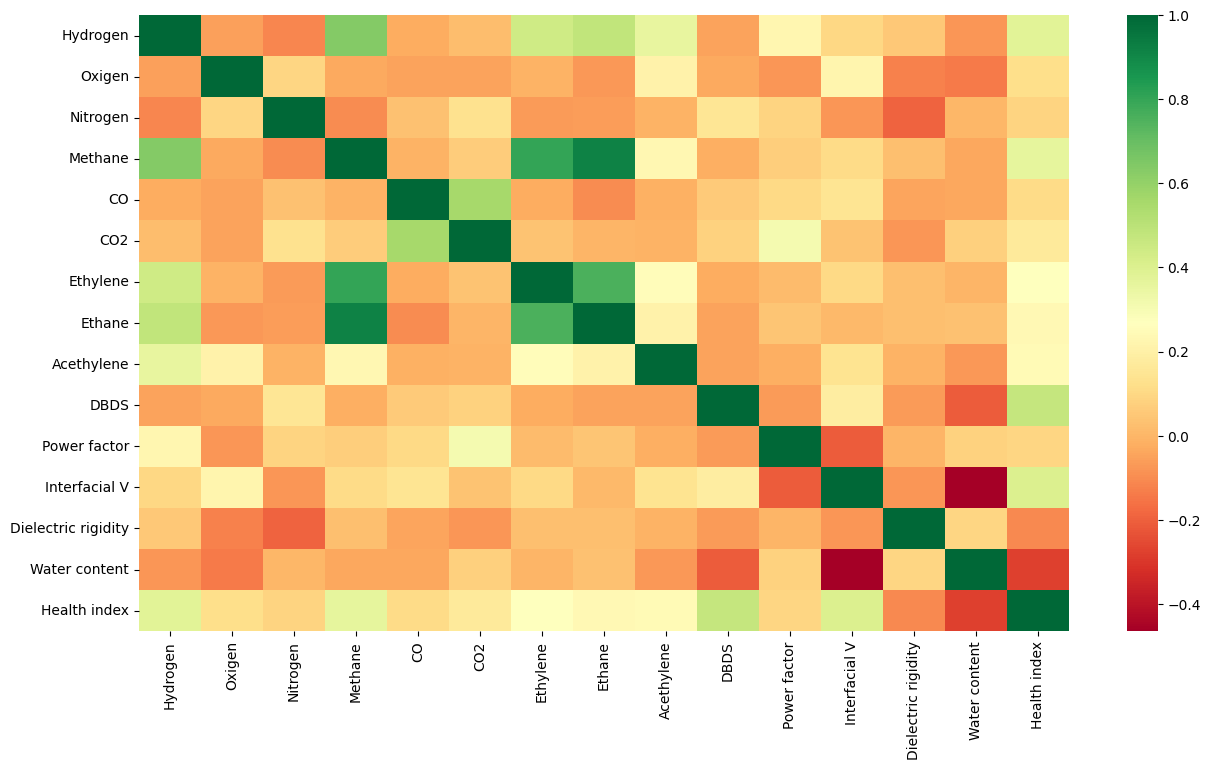

In [169]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 8))

# Create a heatmap using seaborn
sns.heatmap(data.corr(), cmap="RdYlGn")

# Show the plot
plt.show()

# **MLPClassifier()**


In [187]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import warnings
data = pd.read_csv('/content/Health index.csv')
data = data.sample(frac=1, random_state=7)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
def categorize_health_index(y):
  categories = []
  for value in y:
    if value >= 85:
      category = 1
    elif value >= 70:
      category = 2
    elif value >= 50:
      category = 3
    elif value >= 30:
      category = 4
    else:
      category = 5
    categories.append(category)
  return categories

y_categorized = categorize_health_index(y)
y = y_categorized

scaler = MinMaxScaler()
X1 = scaler.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X1, y, test_size=0.2,random_state=7)
print(X)
print('after mapping:')
print(X1)

[[3.6000e+01 2.4700e+02 5.4000e+04 ... 3.2000e+01 5.7000e+01 1.6000e+01]
 [4.0000e+01 2.6600e+02 5.6300e+04 ... 3.2000e+01 5.7000e+01 2.1000e+01]
 [2.3349e+04 2.4750e+03 2.8011e+04 ... 5.2000e+01 7.0000e+01 2.0000e+00]
 ...
 [8.7000e+01 3.6200e+02 7.6100e+04 ... 4.3000e+01 5.2000e+01 4.0000e+00]
 [1.4000e+01 2.6900e+03 1.0300e+04 ... 4.7000e+01 5.4000e+01 2.0000e+00]
 [1.2000e+01 1.5200e+04 6.2800e+04 ... 4.4000e+01 5.6000e+01 1.4000e+01]]
after mapping:
[[1.54182192e-03 7.60477580e-04 6.16891065e-01 ... 3.05555556e-01
  6.25000000e-01 8.74316940e-02]
 [1.71313547e-03 8.36525338e-04 6.45042840e-01 ... 3.05555556e-01
  6.25000000e-01 1.14754098e-01]
 [1.00000000e+00 9.67807783e-03 2.98788250e-01 ... 8.61111111e-01
  8.95833333e-01 1.09289617e-02]
 ...
 [3.72606964e-03 1.22076664e-03 8.87392901e-01 ... 6.11111111e-01
  5.20833333e-01 2.18579235e-02]
 [5.99597413e-04 1.05386183e-02 8.20073439e-02 ... 7.22222222e-01
  5.62500000e-01 1.09289617e-02]
 [5.13940640e-04 6.06100631e-02 7.2460220

In [188]:
warnings.filterwarnings("ignore")

param_grid = {
    'hidden_layer_sizes': [(10,10), (10,20), (10,30),(20,10), (20,20), (20,20),(30,10), (30,10), (30,30)],  # Add more values if needed
    #'activation': ['logistic', 'relu','tanh'],  # Add more activation functions if needed
    'max_iter': [200, 300, 400, 500],  # Add more values if needed
    #'solver': ['adam', 'sgd', 'lbfgs'],  # Add more solvers if needed
    #'batch_size': [5, 10, 20],  # Add more batch sizes if needed
}

mlp = MLPClassifier(solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001,
                    power_t=0.5, shuffle=True, random_state=7, tol=0.0001, verbose=False, warm_start=True,
                    momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9,
                    beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

grid_search = GridSearchCV(mlp, param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Evaluate the model on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test Accuracy:", test_score)


Best Parameters: {'hidden_layer_sizes': (20, 20), 'max_iter': 400}
Test Accuracy: 0.7127659574468085


In [189]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(40,5), activation='tanh', solver='adam',
                      batch_size=20, learning_rate='constant', learning_rate_init=0.001,
                      max_iter=400,random_state=7)

model.fit(x_train, y_train)
model.score(x_test, y_test)


0.7872340425531915

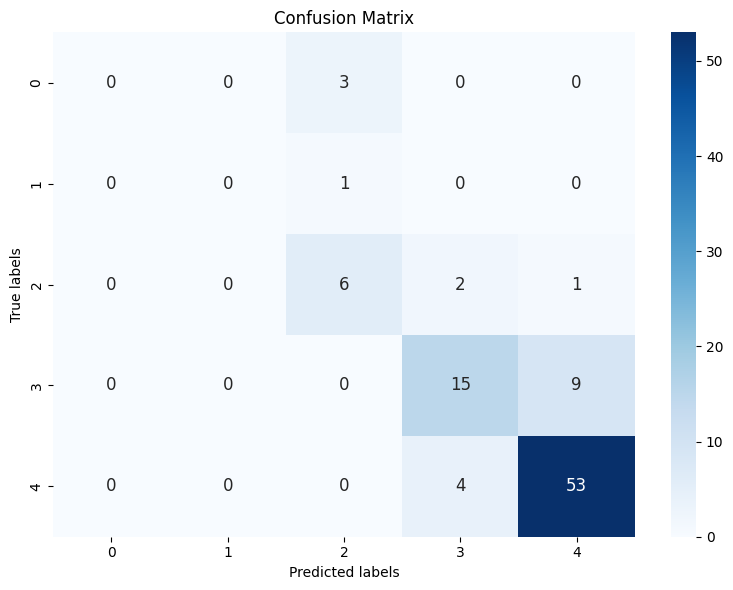

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         1
           3       0.60      0.67      0.63         9
           4       0.71      0.62      0.67        24
           5       0.84      0.93      0.88        57

    accuracy                           0.79        94
   macro avg       0.43      0.44      0.44        94
weighted avg       0.75      0.79      0.77        94



In [190]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Making predictions on the test set
y_pred = model.predict(x_test)

# Calculating confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix as a heatmap with fitted text
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Save the plot as PNG
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300)
plt.show()

# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# **LogisticRegression()**

In [191]:
data = pd.read_csv('/content/Health index.csv')
data = data.sample(frac=1, random_state=7)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
def categorize_health_index(y):
  categories = []
  for value in y:
    if value >= 85:
      category = 1
    elif value >= 70:
      category = 2
    elif value >= 50:
      category = 3
    elif value >= 30:
      category = 4
    else:
      category = 5
    categories.append(category)
  return categories

y_categorized = categorize_health_index(y)
y = y_categorized

scaler = MinMaxScaler()
X1 = scaler.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X1, y, test_size=0.2,random_state=7)
print(X)
print('after mapping:')
print(X1)

[[3.6000e+01 2.4700e+02 5.4000e+04 ... 3.2000e+01 5.7000e+01 1.6000e+01]
 [4.0000e+01 2.6600e+02 5.6300e+04 ... 3.2000e+01 5.7000e+01 2.1000e+01]
 [2.3349e+04 2.4750e+03 2.8011e+04 ... 5.2000e+01 7.0000e+01 2.0000e+00]
 ...
 [8.7000e+01 3.6200e+02 7.6100e+04 ... 4.3000e+01 5.2000e+01 4.0000e+00]
 [1.4000e+01 2.6900e+03 1.0300e+04 ... 4.7000e+01 5.4000e+01 2.0000e+00]
 [1.2000e+01 1.5200e+04 6.2800e+04 ... 4.4000e+01 5.6000e+01 1.4000e+01]]
after mapping:
[[1.54182192e-03 7.60477580e-04 6.16891065e-01 ... 3.05555556e-01
  6.25000000e-01 8.74316940e-02]
 [1.71313547e-03 8.36525338e-04 6.45042840e-01 ... 3.05555556e-01
  6.25000000e-01 1.14754098e-01]
 [1.00000000e+00 9.67807783e-03 2.98788250e-01 ... 8.61111111e-01
  8.95833333e-01 1.09289617e-02]
 ...
 [3.72606964e-03 1.22076664e-03 8.87392901e-01 ... 6.11111111e-01
  5.20833333e-01 2.18579235e-02]
 [5.99597413e-04 1.05386183e-02 8.20073439e-02 ... 7.22222222e-01
  5.62500000e-01 1.09289617e-02]
 [5.13940640e-04 6.06100631e-02 7.2460220

In [192]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [193]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    #'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [50, 100, 200, 300],
}

# Create the Logistic Regression model
logistic_model = LogisticRegression()

# Create GridSearchCV
grid_search = GridSearchCV(logistic_model, param_grid, cv=3, scoring='accuracy')

# Fit the model
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Evaluate the model on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test Accuracy:", test_score)


Best Parameters: {'max_iter': 50, 'penalty': 'none'}
Test Accuracy: 0.7021276595744681


In [196]:
model = LogisticRegression(solver='newton-cg',max_iter=300, random_state=7,penalty='none')
model.fit(x_train, y_train)
model.predict(x_test)
model.score(x_test, y_test)

0.7446808510638298

ValueError: penalty='none' is not supported for the liblinear solver

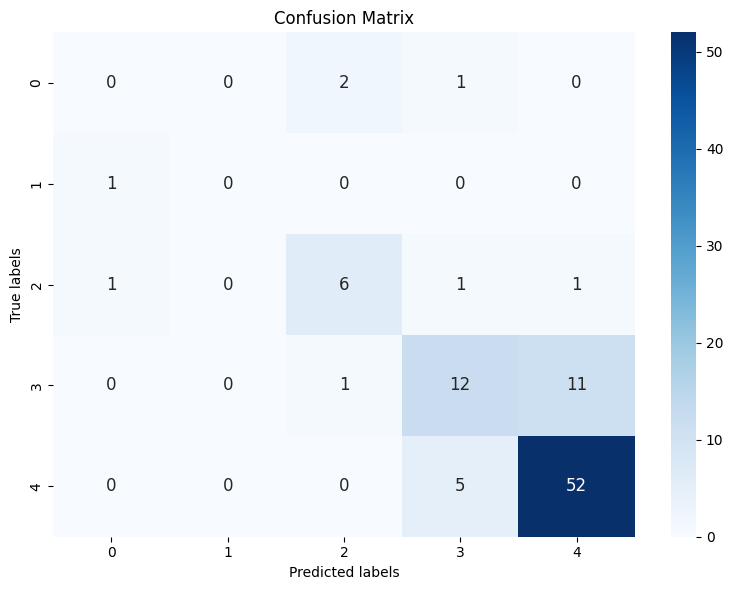

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         1
           3       0.67      0.67      0.67         9
           4       0.63      0.50      0.56        24
           5       0.81      0.91      0.86        57

    accuracy                           0.74        94
   macro avg       0.42      0.42      0.42        94
weighted avg       0.72      0.74      0.73        94



In [195]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Making predictions on the test set
y_pred = model.predict(x_test)

# Calculating confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix as a heatmap with fitted text
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Save the plot as PNG
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300)
plt.show()

# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# **این یک مجموعه داده مقطعی است. روش هایی که برای افزایش داده برای این داده ها وجود دارد عبارت است از:**

In [198]:
from sklearn import tree
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [205]:
data = pd.read_csv('/content/Health index.csv')
data = data.sample(frac=1, random_state=7)
X = data.drop('Health index', axis=1)
y = data['Health index']
def categorize_health_index(y):
  categories = []
  for value in y:
    if value >= 85:
      category = 1
    elif value >= 70:
      category = 2
    elif value >= 50:
      category = 3
    elif value >= 30:
      category = 4
    else:
      category = 5
    categories.append(category)
  return categories

y_categorized = categorize_health_index(y)
y = y_categorized

scaler = MinMaxScaler()
X1 = scaler.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X1, y, test_size=0.2,random_state=7)
print(X)
print('after mapping:')
print(X1)

     Hydrogen  Oxigen  Nitrogen  Methane   CO   CO2  Ethylene  Ethane  \
253        36     247     54000        4   58   776         4     157   
243        40     266     56300        4   86  1110         3     106   
13      23349    2475     28011     5045  156    48      5588    3532   
287        23   14800     40700        1  449  2720         3       0   
370         4    4990     35200        7  760  2600         0       0   
..        ...     ...       ...      ...  ...   ...       ...     ...   
211        70     371     40100        1   12  1750         7     117   
67         25     508     54500       12  317  2750         4      14   
25         87     362     76100       47  560  3920         5      31   
196        14    2690     10300        3  155   735         0       0   
175        12   15200     62800        4  413  4720         5       0   

     Acethylene   DBDS  Power factor  Interfacial V  Dielectric rigidity  \
253           0    0.0          1.00           

In [206]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

best_score = -np.inf
# Define the parameter grids
ccp_alpha_values = np.linspace(0, 0.005, num=100)
max_depth_values = range(1, 30)

for ccp_alpha in ccp_alpha_values:
    for max_depth in max_depth_values:
        reg = DecisionTreeClassifier(ccp_alpha=ccp_alpha, max_depth=max_depth, random_state=7)
        reg.fit(x_train, y_train)
        score = reg.score(x_test, y_test)

        if score > best_score:
            best_score = score
            best_ccp_alpha = ccp_alpha
            best_max_depth = max_depth



In [207]:
print(best_ccp_alpha)
print(best_max_depth)

0.004595959595959596
4


In [208]:
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier(ccp_alpha=best_ccp_alpha, criterion='gini', max_depth=best_max_depth, random_state=7)
clf.fit(x_train, y_train)

y_hat = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_hat)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 84.04%


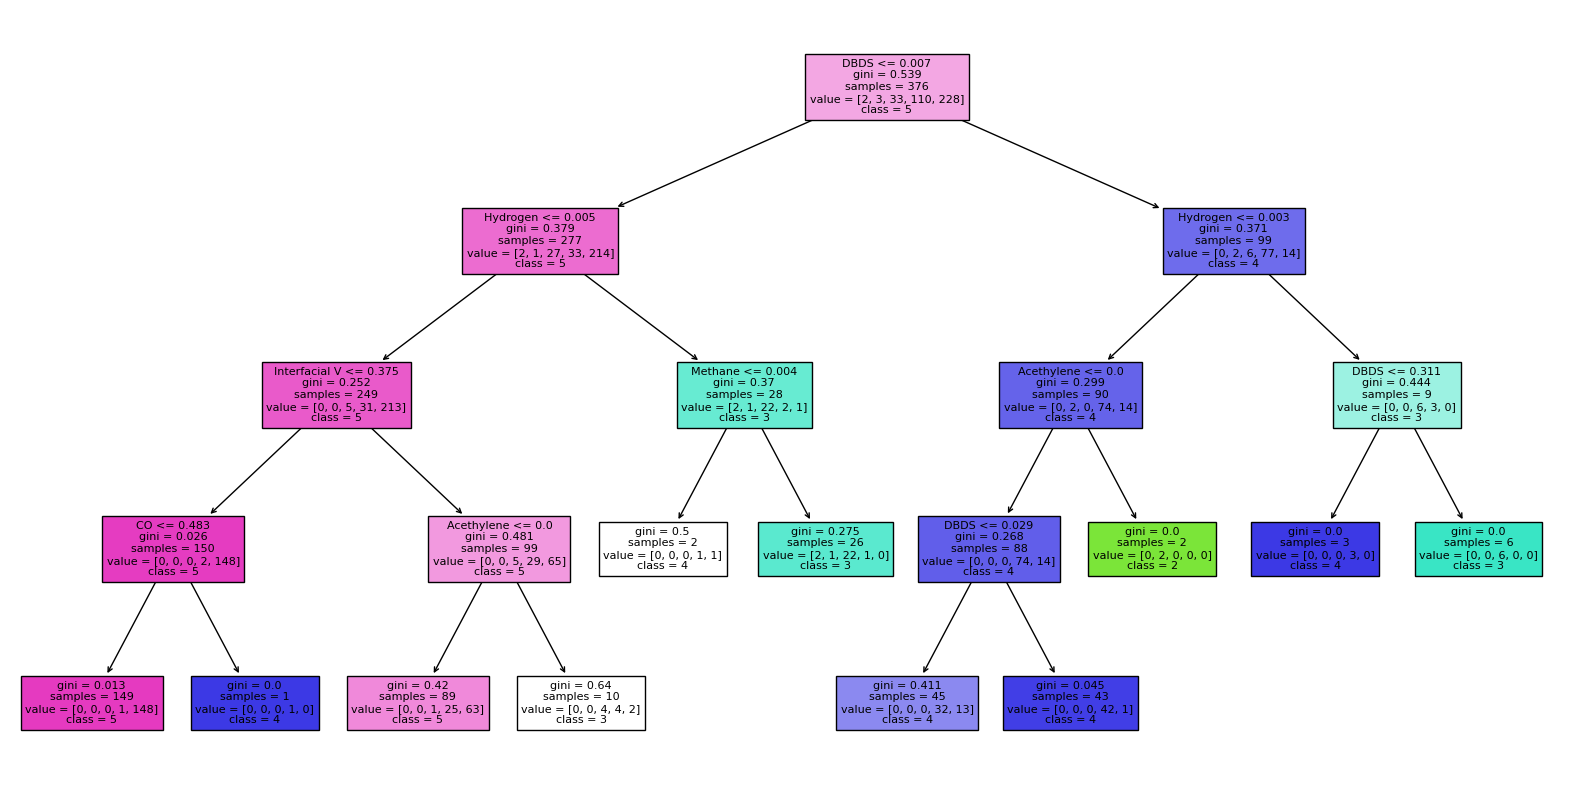

In [212]:
# Convert class names to strings
class_names = list(map(str, clf.classes_))
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=class_names)
plt.show()

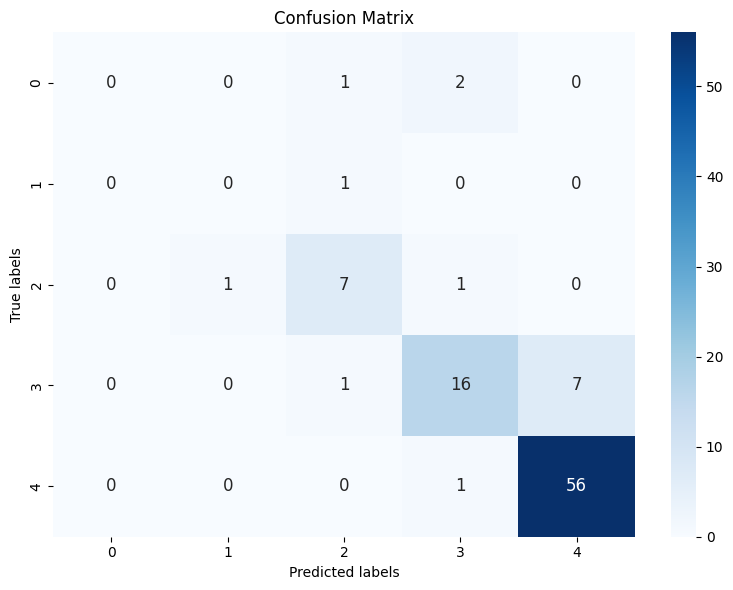

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         1
           3       0.70      0.78      0.74         9
           4       0.80      0.67      0.73        24
           5       0.89      0.98      0.93        57

    accuracy                           0.84        94
   macro avg       0.48      0.49      0.48        94
weighted avg       0.81      0.84      0.82        94



In [213]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Making predictions on the test set
y_pred = y_hat

# Calculating confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix as a heatmap with fitted text
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Save the plot as PNG
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300)
plt.show()

# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))